In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_unique_table_num,set_root_of_unit
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs,gen_cir
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


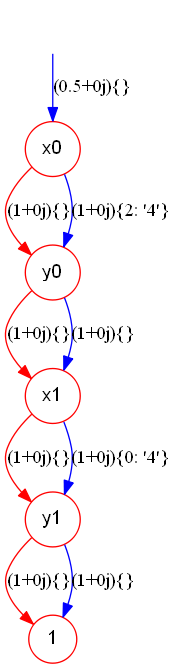

In [2]:
Ini_TDD(['x0','y0','x1','y1','x2','y2'])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
I=np.array([[1,0],[0,1]])
T=np.array([[1,0],[0,np.exp(1j*np.pi/4)]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(H,var)
var2=[Index('x1'),Index('y1')]
ts2=Tensor(H,var2)
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()

0.0069732666015625
(0.3535533905932737+0j)
7


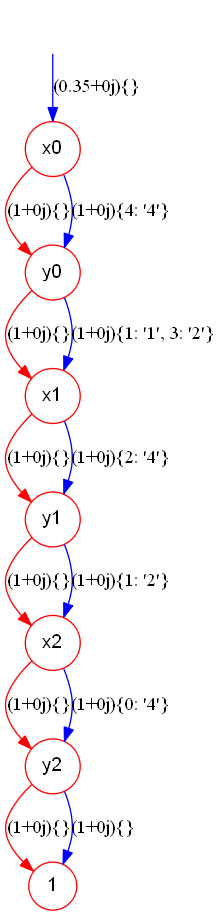

In [3]:
path='Benchmarks/'
file_name="qft_3.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)

Ini_TDD(index_order=all_indexs)
set_root_of_unit(2**3)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
tdd.show()

0.0029449462890625
(1+0j)
3


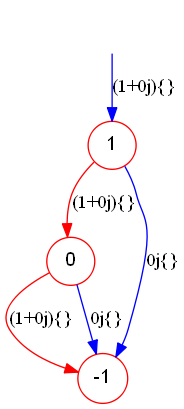

In [4]:
n=2
m=3
cir=gen_cir('Random_Clifford',n,m)
tn,all_indexs = cir_2_tn(cir)
add_inputs(tn,[0]*n,n)
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
tdd.show(False)